Import Liberies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Datasets

In [2]:
# Importing User File

df_user=pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
# Importing Rating File

df_rating = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# Importing Movie File

df_movie = pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',encoding='latin-1')
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Print Shapes of the Datasets

In [5]:
df_user.shape

(6040, 5)

In [6]:
df_rating.shape

(1000209, 4)

In [7]:
df_movie.shape

(3883, 3)

# **1.Creating New Dataset:- Master_Data**

Checking commom columns names

In [8]:
df_movie.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [9]:
df_rating.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [10]:
df_user.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [11]:
df = df_rating.merge(df_movie,on='MovieID',how='inner')
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [12]:
Master_Data = df.merge(df_user,on='UserID',how='inner')
Master_Data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [13]:
Master_Data.size

10002090

In [14]:
Master_Data.shape

(1000209, 10)

In [15]:
Master_Data.isnull().sum().any()

False

# **2.Explore the datasets using visual representations**

1.User Age Distribution

In [16]:
Master_Data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

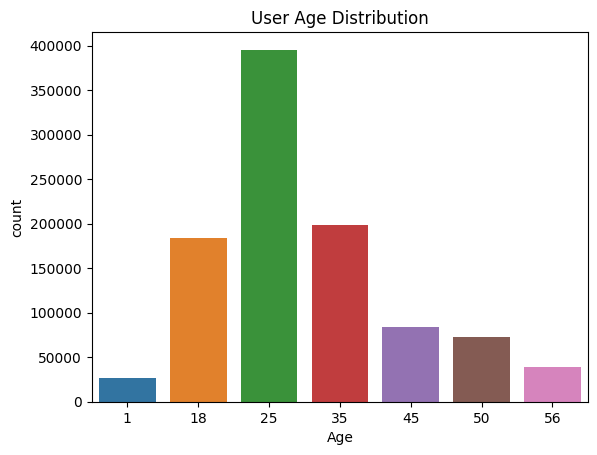

In [17]:
sns.countplot(x=Master_Data['Age'])
plt.title('User Age Distribution')
plt.show()

2. User rating of the movie "Toy Story"

In [18]:
toystory = Master_Data[Master_Data['Title'].str.contains('Toy Story')==True]
toystory.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
50,1,3114,4,978302174,Toy Story 2 (1999),Animation|Children's|Comedy,F,1,10,48067
417,17,3114,5,978159386,Toy Story 2 (1999),Animation|Children's|Comedy,M,50,1,95350
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073


In [19]:
toystory.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

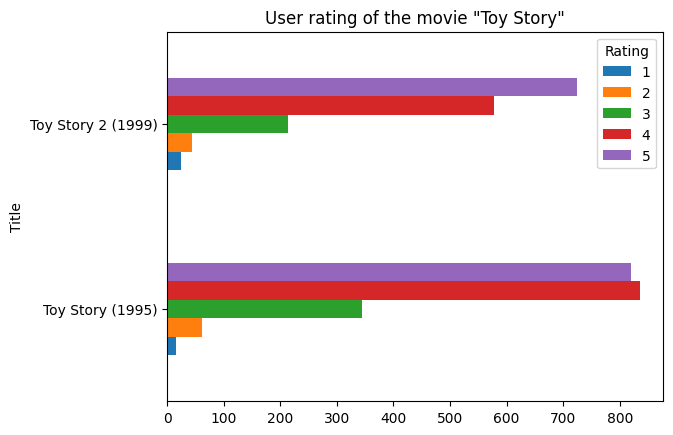

In [20]:
toystory.groupby(['Title','Rating']).size().unstack().plot(kind='barh',legend=True)
plt.title('User rating of the movie "Toy Story"')
plt.show()

3. Top 25 movies by viewership rating

In [21]:
df_Top25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
df_Top25.head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
dtype: int64

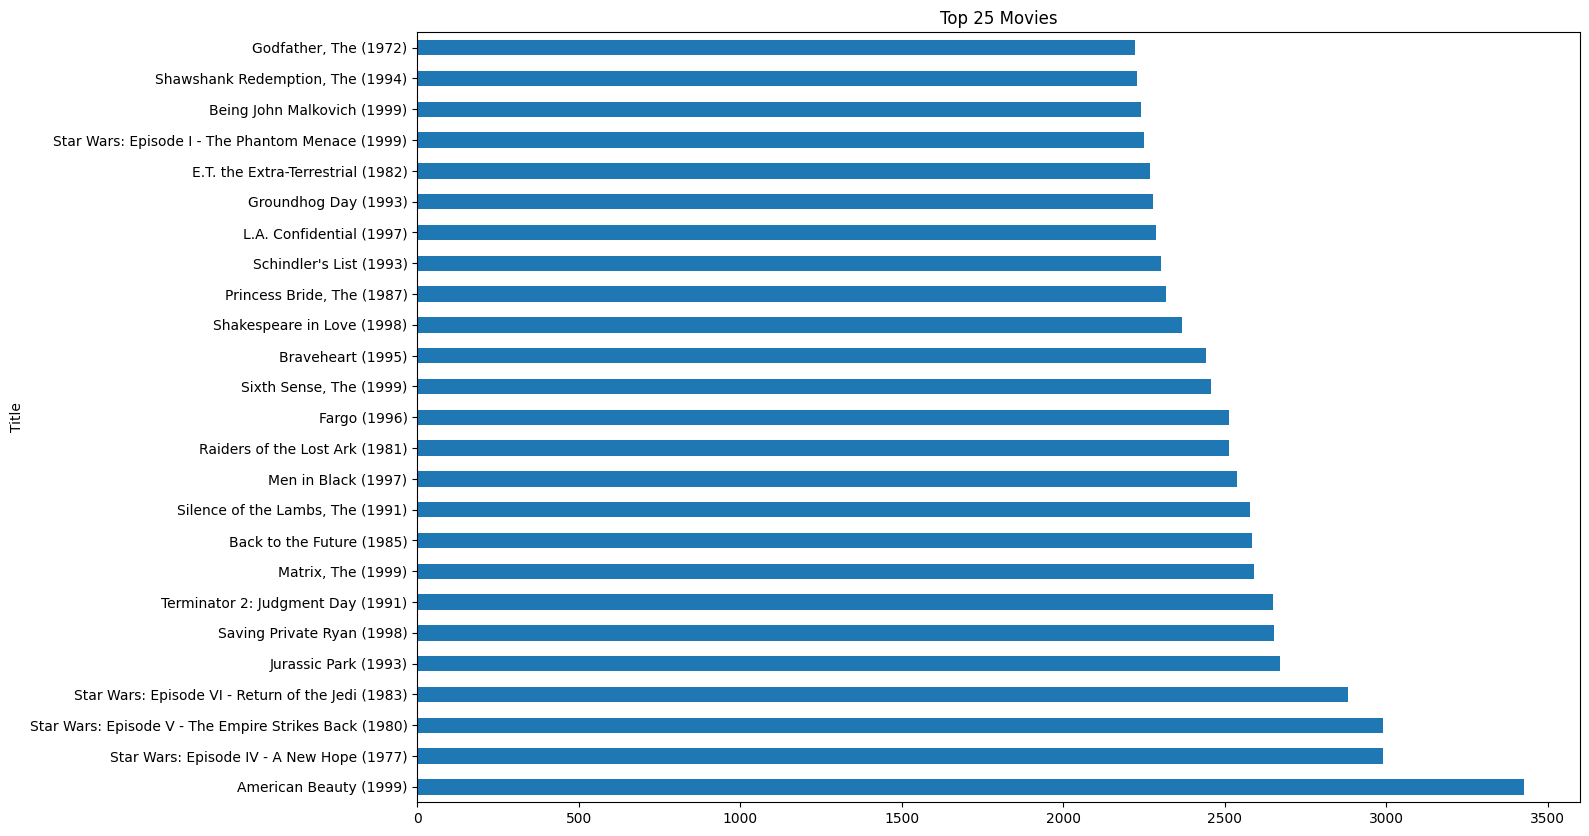

In [22]:
plt.figure(figsize=(15,10))
df_Top25.plot(kind='barh')
plt.title("Top 25 Movies")
plt.show()

4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [23]:
user_2696 = Master_Data[Master_Data['UserID']==2696]
user_2696.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,M,25,7,24210


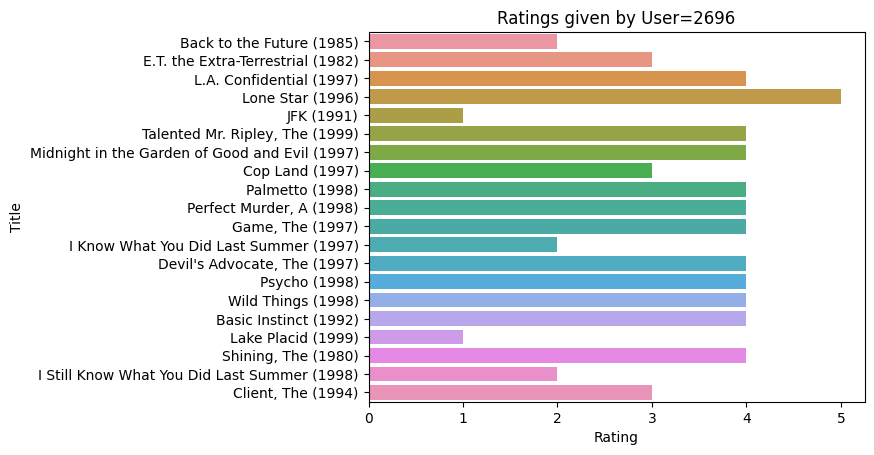

In [24]:
sns.barplot(x=user_2696.Rating,y=user_2696.Title)
plt.title('Ratings given by User=2696')
plt.show()

# **3.Feature Engineering**

1.Find out all the unique genres

In [25]:
Master_Data['Genres'].head()

0                           Drama
1    Animation|Children's|Musical
2                 Musical|Romance
3                           Drama
4     Animation|Children's|Comedy
Name: Genres, dtype: object

In [26]:
df_genres = Master_Data['Genres'].str.split('|')
df_genres.head()

0                             [Drama]
1    [Animation, Children's, Musical]
2                  [Musical, Romance]
3                             [Drama]
4     [Animation, Children's, Comedy]
Name: Genres, dtype: object

In [27]:
List_Genres=set()
for genre in df_genres:
    List_Genres=List_Genres.union(set(genre))
    
List_Genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [28]:
print('Types of the unique genre:- ',len(List_Genres))

Types of the unique genre:-  18


2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [29]:
GenresOnehot=Master_Data['Genres'].str.get_dummies('|')
GenresOnehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Master_Data_1 = Master_Data.copy()
Master_Data_1 = pd.concat([Master_Data,GenresOnehot],axis=1)
Master_Data_1.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Master_Data_1.shape

(1000209, 28)

3. Determine the features affecting the ratings of any particular movie.

In [32]:
Master_Data_1.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [33]:
Master_Data_1.dtypes

UserID          int64
MovieID         int64
Rating          int64
Timestamp       int64
Title          object
Genres         object
Gender         object
Age             int64
Occupation      int64
Zip-code       object
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

4. Develop an appropriate model to predict the movie ratings

In [34]:
GenderOnehot=Master_Data_1['Gender'].str.get_dummies('|')
GenderOnehot.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
Master_Data_2 = pd.concat([Master_Data_1,GenderOnehot],axis=1)
Master_Data_2.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,1,0,0,0,0,0,0,1,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,1,0,1,0,0,0,0,1,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [36]:
new_data = Master_Data_2

new_data.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'F', 'M'],
      dtype='object')

In [37]:
# Input data

X = new_data[['MovieID','Age','Occupation','F','M']].values
Y = new_data[['Rating']].values

In [38]:
X

array([[1193,    1,   10,    1,    0],
       [ 661,    1,   10,    1,    0],
       [ 914,    1,   10,    1,    0],
       ...,
       [3840,   45,    5,    0,    1],
       [3766,   45,    5,    0,    1],
       [3834,   45,    5,    0,    1]], dtype=int64)

In [39]:
Y

array([[5],
       [3],
       [3],
       ...,
       [4],
       [2],
       [2]], dtype=int64)

In [40]:
# Divide the data into train & test sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=0)

In [41]:
X_train

array([[1907,   18,   14,    1,    0],
       [3723,   45,    6,    1,    0],
       [2521,   45,    7,    0,    1],
       ...,
       [1834,   25,    5,    0,    1],
       [2082,   50,    6,    0,    1],
       [2628,   50,    9,    1,    0]], dtype=int64)

In [42]:
Y_train

array([[5],
       [4],
       [1],
       ...,
       [4],
       [2],
       [3]], dtype=int64)

In [43]:
print(X_train.shape) #80% training dataset input
print(Y_train.shape) #80% training dataset input
print(X_test.shape)  #20% testing dataset input
print(Y_test.shape)  #20% testing dataset input

(800167, 5)
(800167, 1)
(200042, 5)
(200042, 1)


In [44]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [45]:
Y_pred = regressor.predict(X_test)
Y_pred

array([[3.59059677],
       [3.54147826],
       [3.51810944],
       ...,
       [3.66620994],
       [3.54476755],
       [3.71906099]])

In [46]:
Y_test # Actual

array([[4],
       [4],
       [4],
       ...,
       [2],
       [3],
       [2]], dtype=int64)

**Error**

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
mas = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

In [49]:
print('Mean Absolute Error:-',mas)
print('Mean Squared Error:- ',mse)
print('Root Mean Squared Error:-',rmse)

Mean Absolute Error:- 0.00796492177053243
Mean Squared Error:-  1.2362090746922196
Root Mean Squared Error:- 1.111849393889397
